Enter 0,1,2 or 3 only. Value taken as n mod 4 = 0.


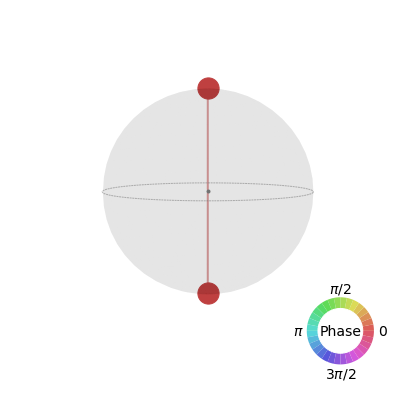

In [42]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere, plot_histogram

def bellstate(n): #returns a bell state depending on the input integer
    if n not in [0,1,2,3]:
        print('Enter 0,1,2 or 3 only. Value taken as n mod 4 = {}.'.format(n%4))
        n = 0
    n = bin(n)[2:].zfill(2)
    cir = QuantumCircuit(2)
    cir.h(0)
    cir.cx(0,1)
    sv = Statevector.from_label(n[::-1])
    return sv.evolve(cir)

psi = bellstate(4)
%matplotlib inline
plot_state_qsphere(psi.data)


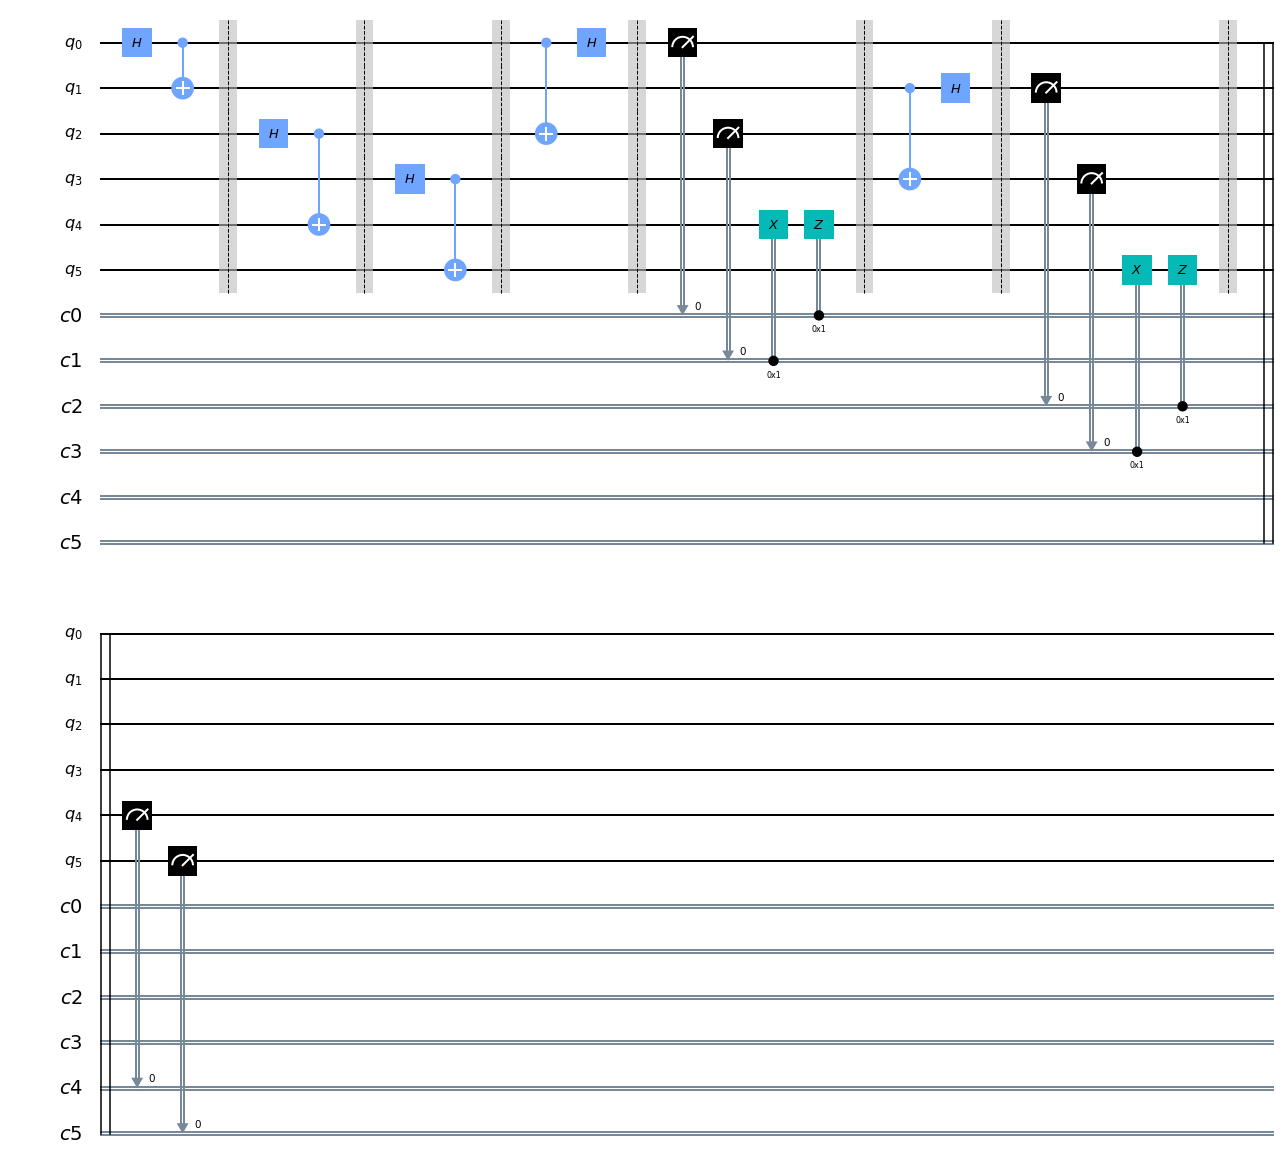

In [38]:
def bell(cir,i,j):
    cir.h(i)
    cir.cx(i,j)

def bell_measure(cir,i,j):
    cir.cx(i,j)
    cir.h(i)

q = QuantumRegister(6,'q')
c0 = ClassicalRegister(1,'c0')
c1 = ClassicalRegister(1,'c1')
c2 = ClassicalRegister(1,'c2')
c3 = ClassicalRegister(1,'c3')
c4 = ClassicalRegister(1,'c4')
c5 = ClassicalRegister(1,'c5')
circuit = QuantumCircuit(q,c0,c1,c2,c3,c4,c5)

#initialize states
bell(circuit,0,1)
circuit.barrier()
bell(circuit,2,4)
circuit.barrier()
bell(circuit,3,5)
circuit.barrier()

#teleport Alice's first qubit
bell_measure(circuit,0,2)
circuit.barrier()
circuit.measure([0,2],[0,1])
circuit.x(4).c_if(c1,1)
circuit.z(4).c_if(c0,1)
circuit.barrier()

#teleport Alice's second qubit
bell_measure(circuit,1,3)
circuit.barrier()
circuit.measure([1,3],[2,3])
circuit.x(5).c_if(c3,1)
circuit.z(5).c_if(c2,1)
circuit.barrier()

#measure Bob's qubits
circuit.measure([4,5],[4,5])

circuit.draw('mpl')



In [47]:
from qiskit import Aer, execute
from collections import defaultdict
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, simulator, shots=10000).result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)
# count = {s.replace(' ',''):counts[s] for s in counts.keys()}
# print(count)
count = defaultdict(int)
for k in counts.keys():
    key = k[0:3]
    count[key]+=counts[k]
print(count)

{'0 0 1 0 1 1': 297, '1 1 1 0 0 0': 308, '0 0 1 0 1 0': 311, '0 0 0 1 0 0': 294, '0 0 0 0 0 0': 331, '1 1 0 0 0 0': 332, '1 1 0 1 0 1': 345, '1 1 1 0 1 0': 316, '1 1 1 1 0 1': 311, '1 1 0 1 0 0': 305, '0 0 1 1 0 0': 310, '0 0 1 1 1 1': 315, '0 0 1 1 1 0': 311, '1 1 0 0 1 0': 302, '0 0 0 0 0 1': 302, '1 1 1 0 1 1': 320, '1 1 1 1 0 0': 303, '1 1 1 1 1 0': 339, '0 0 1 0 0 0': 297, '1 1 0 0 1 1': 307, '0 0 0 0 1 1': 320, '0 0 1 1 0 1': 329, '1 1 1 0 0 1': 330, '0 0 0 0 1 0': 302, '0 0 1 0 0 1': 335, '0 0 0 1 0 1': 314, '1 1 1 1 1 1': 311, '0 0 0 1 1 1': 292, '0 0 0 1 1 0': 279, '1 1 0 1 1 0': 321, '1 1 0 0 0 1': 310, '1 1 0 1 1 1': 301}
defaultdict(<class 'int'>, {'0 0': 4939, '1 1': 5061})
